In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv("/content/diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
x=df[["Glucose","BMI"]]

In [7]:
x

,Glucose,BMI
0,148,33.6
1,85,26.6
2,183,23.3
3,89,28.1
4,137,43.1
...,...,...
763,101,32.9
764,122,36.8
765,121,26.2
766,126,30.1


In [8]:
db=DBSCAN(eps=5,min_samples=5)

In [11]:
cluster= db.fit_predict(x)

In [12]:
cluster

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

<Axes: xlabel='Glucose', ylabel='BMI'>

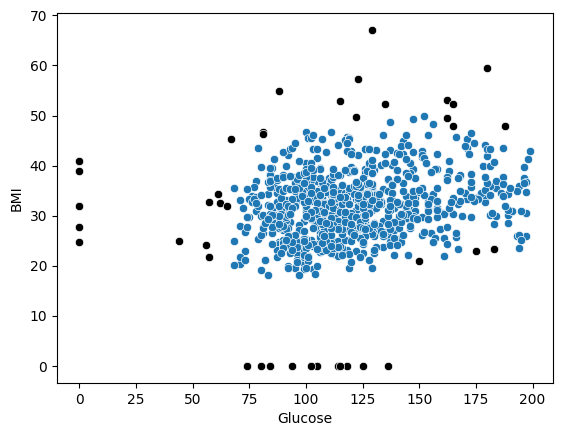

In [14]:
sns.scatterplot(x=x[cluster==-1]['Glucose'], y=x[cluster==-1]['BMI'],color='black')
sns.scatterplot(x=x[cluster==0]['Glucose'], y=x[cluster==0]['BMI'])
sns.scatterplot(x=x[cluster==1]['Glucose'], y=x[cluster==1]['BMI'])
sns.scatterplot(x=x[cluster==2]['Glucose'], y=x[cluster==2]['BMI'])
sns.scatterplot(x=x[cluster==3]['Glucose'], y=x[cluster==3]['BMI'])
sns.scatterplot(x=x[cluster ==4]['Glucose'], y=x[cluster==4]['BMI'])

In [15]:
from sklearn.neighbors import NearestNeighbors

In [16]:
N=NearestNeighbors(n_neighbors=3)

In [17]:
n=N.fit(x)

In [18]:
distance,indices=n.kneighbors(x)

In [19]:
distance=np.sort(distance,axis=0)
distance

array([[ 0.        ,  0.        ,  0.1       ],
       [ 0.        ,  0.        ,  0.2       ],
       [ 0.        ,  0.        ,  0.2       ],
       ...,
       [ 0.        , 11.49086594, 14.67685252],
       [ 0.        , 12.0266371 , 15.96997182],
       [ 0.        , 14.00892573, 18.        ]])

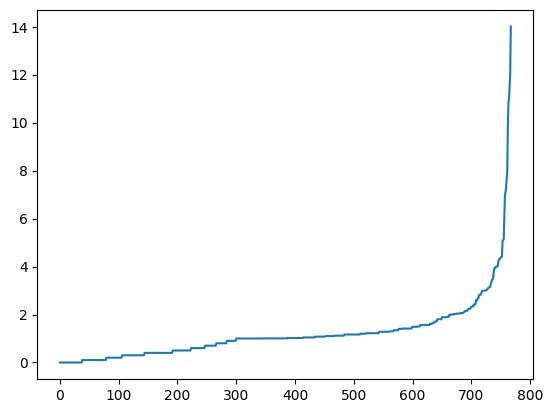

In [20]:
distances=distance[:,1]
distances
plt.plot(distances)

In [21]:
indices

array([[  0, 148, 166],
       [  1, 482, 194],
       [  2, 604, 245],
       ...,
       [765, 582, 653],
       [766, 711, 297],
       [767, 729, 637]])

In [22]:
db= DBSCAN(eps=5,min_samples=3)

In [23]:
cluster= db.fit_predict(x)

In [24]:
cluster

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

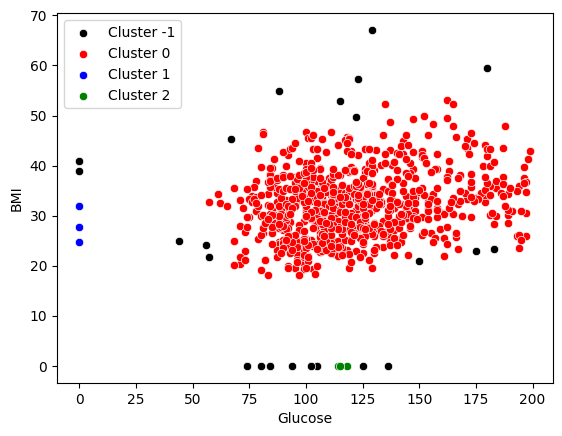

In [30]:
for label, color in zip([-1, 0, 1, 2, 3], ['black', 'red', 'blue', 'green', 'orange']):
    sns.scatterplot(x=x[cluster==label]['Glucose'], y=x[cluster==label]['BMI'], color=color, label=f'Cluster {label}')


<Axes: xlabel='Glucose', ylabel='BMI'>

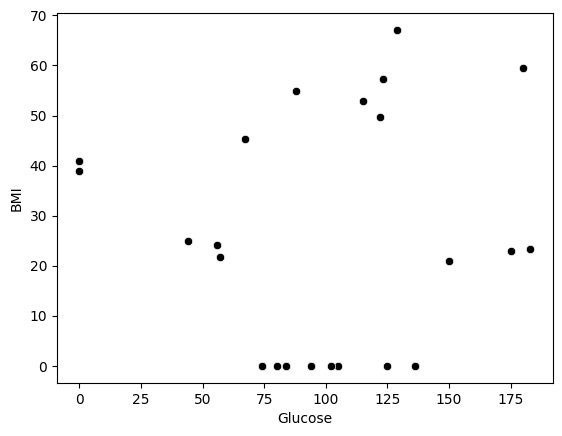

In [33]:
sns.scatterplot(x=x[cluster==-1]['Glucose'], y=x[cluster==-1]['BMI'], color='black')